In [1]:
#importing the libraries

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
#import the data
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
data.shape

(303, 14)

In [4]:
#change the column names.(found in UCI website)

data.columns = ['age',
            'sex',
             'cp',
             'restbp',
             'chol',
             'fbs',
             'restecg',
             'thalach',
             'exang',
             'oldpeak',
             'slope',
             'ca',
             'thal',
              'hd']

data.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
#Identifying the missing data

data.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [6]:
#identify the data type of each column.

data.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [7]:
data.ca.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
data.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [9]:
## dealing with missing data.

len(data.loc[(data['ca'] == '?') 
                  | (data['thal'] == '?')])

6

In [10]:
data[(data['ca'] == '?') | (data['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [11]:
len(data)

303

In [12]:
data_no_missing = data.loc[(data['ca'] != '?') 
                          & (data['thal'] != '?')]

data_no_missing.shape

(297, 14)

In [13]:
data_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [14]:
data_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [15]:
#Split the data into dependent and independent variables

X = data_no_missing.drop('hd', axis =1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [16]:
y = data_no_missing['hd'].copy()

y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [17]:
#format the data - One hot encoding

data_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [18]:
# Age, restbp, chol, thalach - These are good to be float values and all the remaining features need to inspect and apply one hot encoding

data_no_missing['cp'].unique()

array([1., 4., 3., 2.])

In [19]:
pd.get_dummies(X, columns = ['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [20]:
X_encoded = pd.get_dummies(X, columns = ['cp', 'restecg', 'slope', 'thal'])

X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [21]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [22]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1], dtype=int64)

In [23]:
# Build a Priliminary Classification Tree.

#Split the data into Training and test sets.

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)

#Create the decision Tree model and fit it to training data.

clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

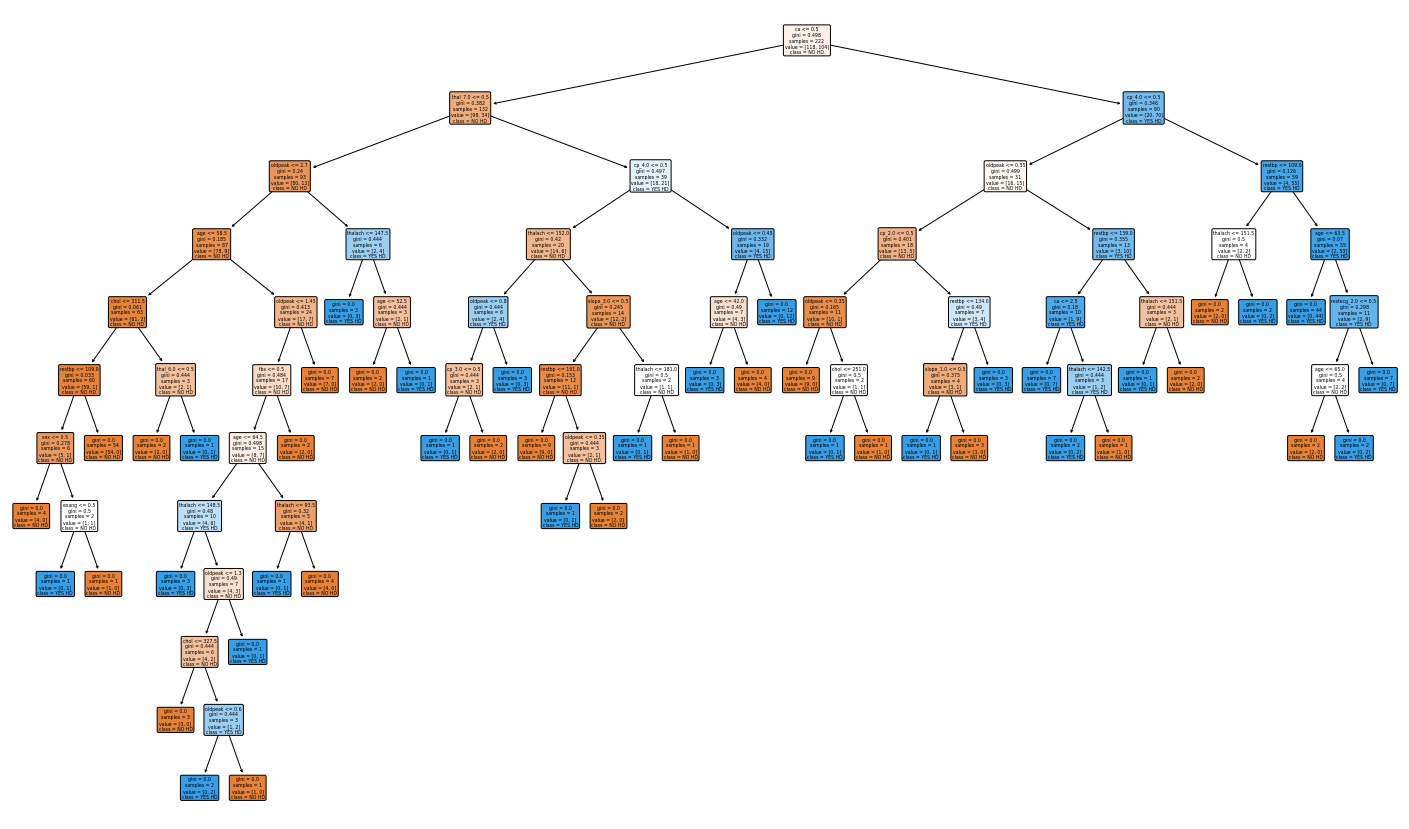

In [24]:
plt.figure(figsize = (25, 15))
plot_tree(clf_dt, filled = True,
         rounded = True, feature_names = X_encoded.columns, class_names = ["NO HD", "YES HD"]);

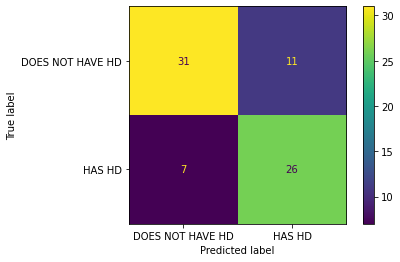

In [25]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ["DOES NOT HAVE HD", "HAS HD"])

### This model is overfit. It can be avoided by prune the Tree.

- Cost Complexity Pruning.

- Decision Trees are notorious of being overfit to the Training Dataset and there are lot of Parameters, like max_depth, min_samples, that are designed to reduce overfitting. However, pruning a tress with cost complexity pruning can simplify the whold process of finding a similar tress that improves the accuracy with the testing dataset,


- pruning a decision tree is all about finding the right value for the pruning paramenters, alpha, which controls how little or how much pruning happens. One way to find the optimal value for alpha ia to plot the accuracy of the tree as a function of different value. We'll do this for both the training and testing dataset.

- First, let's extract the different values of alpha that are available for this tress and build a pruned tress for each value for alpha. Note: we omit the maximum value for alpha with ccp_alphas = ccp_alphas[:-1] because it would prune all leaves, leaving us with only a root instead of a tree.

In [26]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determin the values of alphas
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)


In [27]:
clf_dts

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0029529529529529544, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003861003861003862, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004054054054054055, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004095004095004095, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004293579293579285, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005148005148005148, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005412976001211295, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005787605787605791, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006006006006006006, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006675906675906675, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006756756756756757, random_state=0),
 Decision

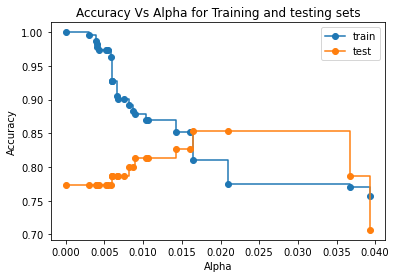

In [28]:
train_score = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_score = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Vs Alpha for Training and testing sets")
ax.plot(ccp_alphas, train_score, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_score, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

<AxesSubplot:xlabel='Tree'>

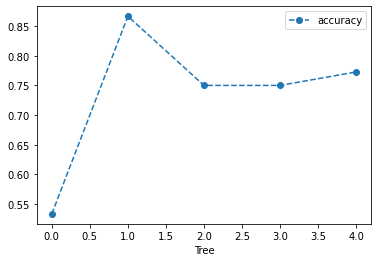

In [29]:
# In the above graph, The training accuracy hits at 0.016 and and for for testing accuracy it is started dropping at 0.016.
# So, consider the alpha value as 0.016

# Cost complexity pruning - Cross validation for finding the best alpha

clf_df = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.016)

scores = cross_val_score(clf_df, X_train, y_train, cv = 5)
df = pd.DataFrame(data = {'Tree' : range(5), 'accuracy' : scores})

df.plot(x = 'Tree', y = 'accuracy', marker = 'o', linestyle = '--')

In [31]:
# Create an array to store the scores of each cross validation.

alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv= 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns = ['Alpha', 'mean_accuracy', 'std'])

In [32]:
alpha_results.head()

,Alpha,mean_accuracy,std
0,0.000000,0.675556,0.099330
1,0.002953,0.675556,0.099330
2,0.003861,0.680000,0.093173
3,0.004054,0.680000,0.093173
4,0.004095,0.680000,0.093173


<AxesSubplot:xlabel='Alpha'>

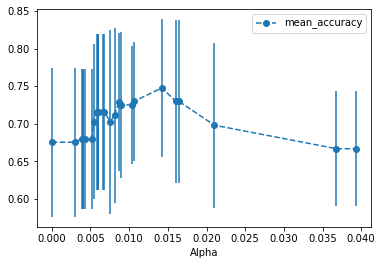

In [34]:
alpha_results.plot(x = 'Alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o', linestyle = '--')

In [47]:
ideal_ccp_alpha = alpha_results[(alpha_results['Alpha'] > 0.014) & (alpha_results['Alpha'] < 0.015)]['Alpha']

ideal_ccp_alpha = float(ideal_ccp_alpha)

In [48]:
#Build, Evaluate, Drawing and interpreting the final Classification Tree

clf_ft_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_ccp_alpha)
clf_ft_pruned = clf_ft_pruned.fit(X_train, y_train)

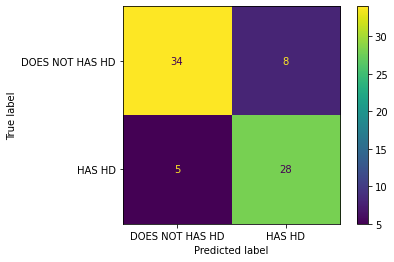

In [50]:
plot_confusion_matrix(clf_ft_pruned, X_test, y_test, display_labels = ['DOES NOT HAS HD', 'HAS HD'])

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = NO HD'),
 Text(257.53846153846155, 254.8125, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = NO HD'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = NO HD'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = NO HD'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = YES HD'),
 Text(386.3076923076923, 152.8875, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = YES HD'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = NO HD'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = YES HD'),
 Text(708.2307692307693, 254.8125, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = YES H

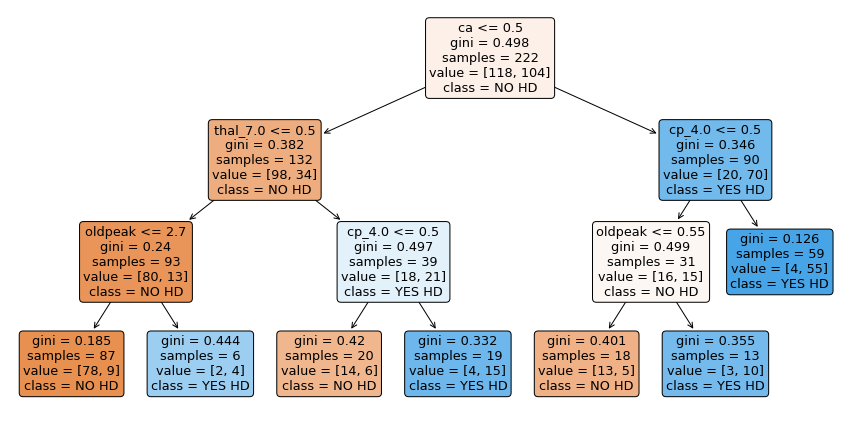

In [53]:
plt.figure(figsize = (15, 7.5))
plot_tree(clf_ft_pruned, feature_names = X_encoded.columns, filled = True, rounded = True, class_names = ['NO HD', 'YES HD'])